Inciso (b) - Matriz de Transição P:
[[1.  0.  0.  0. ]
 [0.3 0.4 0.3 0. ]
 [0.  0.3 0.4 0.3]
 [0.  0.  0.  1. ]]

Inciso (c) - Matriz de transição P³:
[[1.    0.    0.    0.   ]
 [0.495 0.172 0.171 0.162]
 [0.162 0.171 0.172 0.495]
 [0.    0.    0.    1.   ]]

P(1→0) no passo 3: 0.495
P(1→3) no passo 3: 0.162

Inciso (d) - Matriz Fundamental N:
[[2.22222222 1.11111111]
 [1.11111111 2.22222222]]

Tempo médio de absorção:
Estado 1: 3.333 passos
Estado 2: 3.333 passos

Inciso (e) - Matriz de Absorção B:
Linha 1: início no estado 1
Linha 2: início no estado 2
[[0.66666667 0.33333333]
 [0.33333333 0.66666667]]

Inciso (f) - Simulando trajetória com início no estado 1


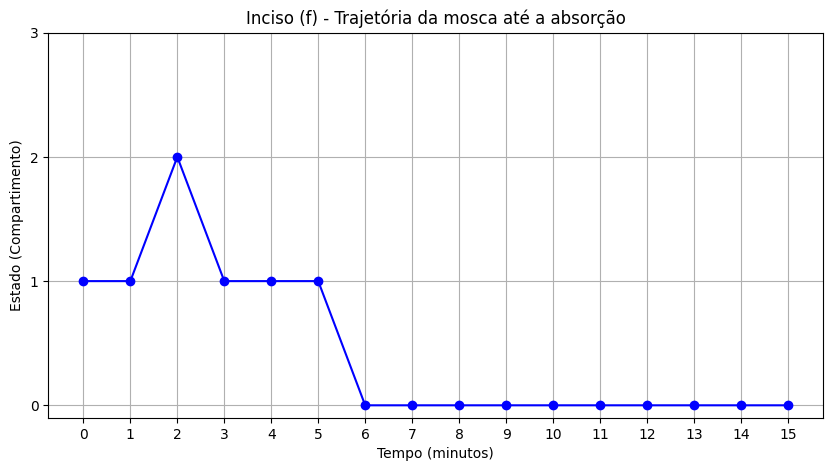

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Inciso (b) - Matriz de transição
P = np.array([
    [1.0, 0.0, 0.0, 0.0],
    [0.3, 0.4, 0.3, 0.0],
    [0.0, 0.3, 0.4, 0.3],
    [0.0, 0.0, 0.0, 1.0]
])
print("Inciso (b) - Matriz de Transição P:")
print(P)

# Inciso (c) - P^3 e probabilidades de absorção no 3º minuto
P3 = np.linalg.matrix_power(P, 3)
p13 = P3[1, 3]
p10 = P3[1, 0]

print("\nInciso (c) - Matriz de transição P³:")
print(P3)
print(f"\nP(1→0) no passo 3: {p10:.3f}")
print(f"P(1→3) no passo 3: {p13:.3f}")

# Inciso (d) - Matriz fundamental N e tempo médio de absorção
Q = np.array([
    [0.4, 0.3],
    [0.3, 0.4]
])
I = np.eye(2)
N = np.linalg.inv(I - Q)
t = N @ np.ones((2, 1))
print("\nInciso (d) - Matriz Fundamental N:")
print(N)
print("\nTempo médio de absorção:")
print(f"Estado 1: {t[0][0]:.3f} passos")
print(f"Estado 2: {t[1][0]:.3f} passos")

# Inciso (e) - Matriz de absorção B
R = np.array([
    [0.3, 0.0],
    [0.0, 0.3]
])
B = N @ R
print("\nInciso (e) - Matriz de Absorção B:")
print("Linha 1: início no estado 1")
print("Linha 2: início no estado 2")
print(B)

# Inciso (f) - Simulação da trajetória da mosca
tempo_total = 15
estado_inicial = np.random.choice([1, 2])
print(f"\nInciso (f) - Simulando trajetória com início no estado {estado_inicial}")
estado_atual = estado_inicial
trajetoria = [estado_atual]

for _ in range(1, tempo_total + 1):
    probas = P[estado_atual]
    proximo = np.random.choice([0, 1, 2, 3], p=probas)
    estado_atual = proximo
    trajetoria.append(estado_atual)
    if estado_atual in [0, 3]:
        trajetoria += [estado_atual] * (tempo_total - len(trajetoria) + 1)
        break

# Gráfico da trajetória
plt.figure(figsize=(10, 5))
plt.plot(range(len(trajetoria)), trajetoria, marker='o', linestyle='-', color='blue')
plt.yticks([0, 1, 2, 3])
plt.xticks(range(tempo_total + 1))
plt.xlabel("Tempo (minutos)")
plt.ylabel("Estado (Compartimento)")
plt.title("Inciso (f) - Trajetória da mosca até a absorção")
plt.grid(True)
plt.show()
